In [1]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade
#pip install hyperopt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting  import plot_decision_regions 

Using TensorFlow backend


In [2]:
df=pd.read_csv("5.outlier.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [3]:
df.shape

(600, 3)

In [5]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
x=df.iloc[0:,:2]

In [8]:
y=df.iloc[0:,2]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [10]:
x_train.value_counts().sum()

540

In [11]:
y_train.value_counts()

1    273
0    267
Name: 2, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [13]:
trials = Trials()

In [14]:
from keras.regularizers import L1,L2,L1L2

In [15]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(2,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=25),activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),kernel_initializer="he_normal"))

                    
                
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
    return model

In [16]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=25,directory="C:\\Users\\admin\\main\\folder5",project_name="f1")

In [17]:
tuner.search(x_trainp,y_train,epochs=30,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 08s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 31s


In [18]:
tuner.results_summary()


Results summary
Results in C:\Users\admin\main\folder5\f1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 4
neurons1: 11
neurons2: 15
neurons3: 10
neurons4: 23
neurons5: 1
neurons6: 1
neurons7: 1
neurons8: 1
neurons9: 1
Score: 1.0

Trial 01 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 18
neurons1: 16
neurons2: 18
neurons3: 3
neurons4: 20
neurons5: 10
neurons6: 10
neurons7: 1
neurons8: 9
neurons9: 23
Score: 1.0

Trial 03 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 16
neurons1: 4
neurons2: 15
neurons3: 24
neurons4: 7
neurons5: 8
neurons6: 20
neurons7: 11
neurons8: 2
neurons9: 15
Score: 1.0

Trial 04 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 3
neurons1: 6
neurons2: 22
neurons3: 20
neurons4: 19
neurons5: 8
neurons6: 20
neurons7: 5
neurons8: 4
neurons9: 10
Score: 1.0

Trial 06 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 5
neurons1: 24
neurons2: 23
neurons3: 10
neurons4: 18
neur

In [19]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 10,
 'neurons0': 4,
 'neurons1': 11,
 'neurons2': 15,
 'neurons3': 10,
 'neurons4': 23,
 'neurons5': 1,
 'neurons6': 1,
 'neurons7': 1,
 'neurons8': 1,
 'neurons9': 1}

In [20]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [21]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 11)                55        
                                                                 
 dense_2 (Dense)             (None, 15)                180       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 23)                253       
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [22]:
history=fmodel.fit(x_trainp,y_train,batch_size=10,epochs=30,validation_split=0.1)

Epoch 1/30
49/49 [==============================] - 3s 10ms/step - loss: 0.4024 - accuracy: 1.0000 - val_loss: 0.3682 - val_accuracy: 1.0000
Epoch 2/30
49/49 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 1.0000 - val_loss: 0.3294 - val_accuracy: 1.0000
Epoch 3/30
49/49 [==============================] - 0s 4ms/step - loss: 0.3169 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 1.0000
Epoch 4/30
49/49 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 1.0000 - val_loss: 0.2896 - val_accuracy: 1.0000
Epoch 5/30
49/49 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 1.0000 - val_loss: 0.2771 - val_accuracy: 1.0000
Epoch 6/30
49/49 [==============================] - 0s 4ms/step - loss: 0.2716 - accuracy: 1.0000 - val_loss: 0.2669 - val_accuracy: 1.0000
Epoch 7/30
49/49 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 1.0000
Epoch 8/30
49/49 [=

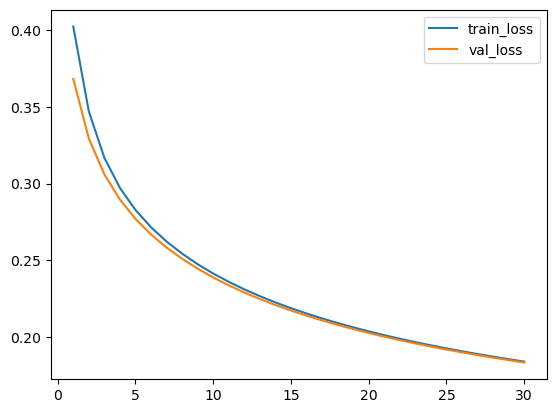

In [23]:
plt.plot(range(1,31),history.history["loss"],label="train_loss")
plt.plot(range(1,31),history.history["val_loss"],label="val_loss")
plt.legend()

In [24]:
history.history['val_loss']

[0.36823180317878723,
 0.32942745089530945,
 0.30607202649116516,
 0.28962284326553345,
 0.27705055475234985,
 0.26690152287483215,
 0.25837939977645874,
 0.25104767084121704,
 0.2446150779724121,
 0.2388971596956253,
 0.2337489277124405,
 0.2290937751531601,
 0.2248494178056717,
 0.22095192968845367,
 0.21734997630119324,
 0.2140110582113266,
 0.21089886128902435,
 0.2079981118440628,
 0.20527905225753784,
 0.20272444188594818,
 0.20031975209712982,
 0.19805167615413666,
 0.1959037035703659,
 0.19386672973632812,
 0.19193018972873688,
 0.1900877058506012,
 0.18832790851593018,
 0.18665002286434174,
 0.18504425883293152,
 0.1835060864686966]

In [25]:
predicted=fmodel.predict(x_test)

2/2 [==============================] - 0s 8ms/step


In [26]:
predicted=np.where(predicted>0.5,1,0)

In [27]:
accuracy_score(y_test,predicted)

1.0

In [28]:
confusion_matrix(y_test,predicted)

array([[33,  0],
       [ 0, 27]], dtype=int64)

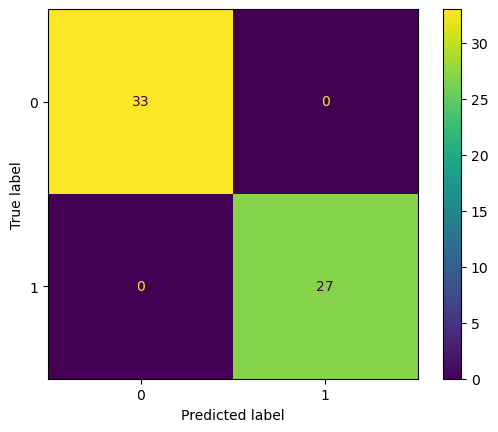

In [29]:

cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

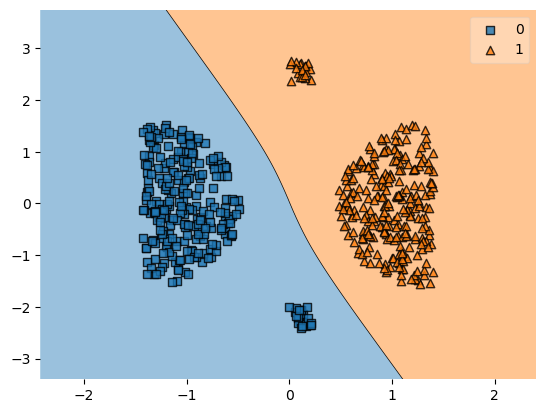

In [30]:
y_train_int = y_train.values.astype(int)
plot_decision_regions(x_trainp, y_train_int, clf=fmodel)

In [31]:
y_test_int = y_test.values.astype(int)

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

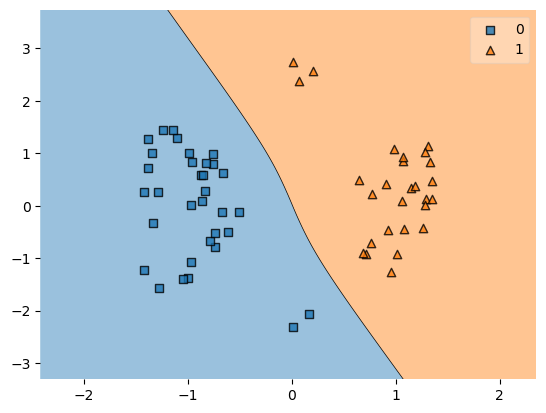

In [32]:

plot_decision_regions(x_testp,y_test_int,clf=fmodel)